In [1]:
import scanpy as sc
import mudata as md
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sys
sys.path.append('../')

from latentcor import get_tps, latentcor
from utils.gglasso_pipeline import gg_lasso_network_analysis

np.random.seed(42)

In [2]:
ec_adata = sc.read_h5ad(filename='../data/ec_prepro.h5ad')
ec_adata

AnnData object with n_obs × n_vars = 5964 × 3642
    obs: 'strains', 'n_genes_by_counts', 'total_counts', 'n_genes', 'n_counts'
    var: 'strains', 'matchin_protein', 'protein', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'var_counts'
    uns: 'genes_match', 'protein_match', 'strains_colors', 'unmatch_genes'
    layers: 'counts', 'counts_scaled', 'sqrt_counts', 'sqrt_counts_scaled'

### Select 50 random genes

In [3]:
n_genes = 50
random_indices = np.random.choice(ec_adata.shape[1], n_genes, replace=False)
ec_adata_50 = ec_adata[:, random_indices].copy()
ec_adata_50

AnnData object with n_obs × n_vars = 5964 × 50
    obs: 'strains', 'n_genes_by_counts', 'total_counts', 'n_genes', 'n_counts'
    var: 'strains', 'matchin_protein', 'protein', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'var_counts'
    uns: 'genes_match', 'protein_match', 'unmatch_genes'
    layers: 'counts', 'counts_scaled', 'sqrt_counts', 'sqrt_counts_scaled'

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\statsmodels\stats\correlation_tools.py:90: IterationLimitWarning: 
Maximum iteration reached.

  warnings.warn(iteration_limit_doc, IterationLimitWarning)


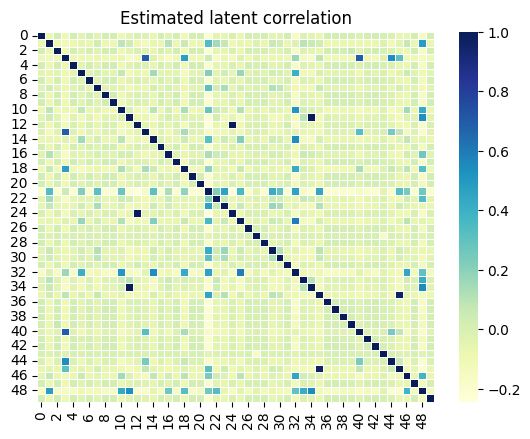

In [4]:
tps = ['tru' for i in range(ec_adata_50.shape[1])]
estimate = latentcor(ec_adata_50.layers['counts'].A, tps=tps, showplot=True, use_nearPD=True, method='original')

In [6]:
est_pd_ori_rnd_1 = gg_lasso_network_analysis(N=ec_adata_50.shape[0], estimate=estimate)

In [7]:
est_pd_ori_rnd_1.create_problem(S_col='R')

 
SINGLE GRAPHICAL LASSO PROBLEM 
Regularization parameters:
{'lambda1': 0.05, 'mu1': None}


In [13]:
est_pd_ori_rnd_1.model_selection(lambda1_range=np.logspace(0, -2, 50))

ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 11 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 23 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 27 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated af

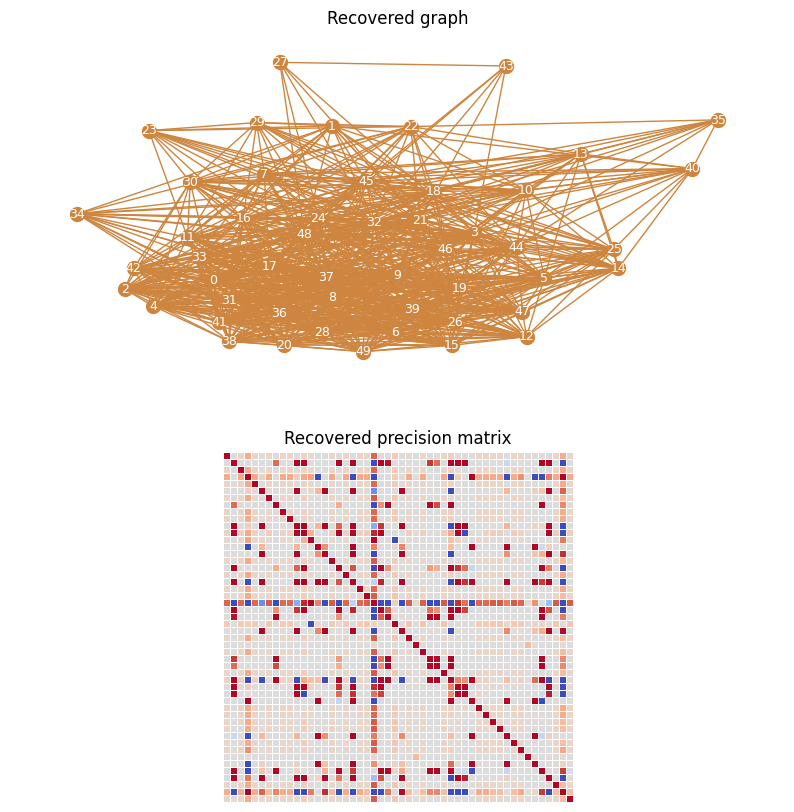

In [14]:
est_pd_ori_rnd_1.plot_graph_and_percision_matrix(fig_size=(10, 10))

### Draw next 50 rnd

In [15]:
n_genes = 50
random_indices = np.random.choice(ec_adata.shape[1], n_genes, replace=False)
ec_adata_50 = ec_adata[:, random_indices].copy()
ec_adata_50

AnnData object with n_obs × n_vars = 5964 × 50
    obs: 'strains', 'n_genes_by_counts', 'total_counts', 'n_genes', 'n_counts'
    var: 'strains', 'matchin_protein', 'protein', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'var_counts'
    uns: 'genes_match', 'protein_match', 'unmatch_genes'
    layers: 'counts', 'counts_scaled', 'sqrt_counts', 'sqrt_counts_scaled'

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\statsmodels\stats\correlation_tools.py:90: IterationLimitWarning: 
Maximum iteration reached.

  warnings.warn(iteration_limit_doc, IterationLimitWarning)


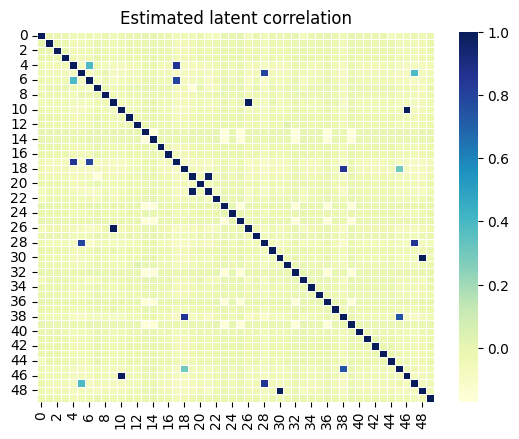

In [16]:
tps = ['tru' for i in range(ec_adata_50.shape[1])]
estimate = latentcor(ec_adata_50.layers['counts'].A, tps=tps, showplot=True, use_nearPD=True, method='original')

In [17]:
est_pd_ori_rnd_2 = gg_lasso_network_analysis(N=ec_adata_50.shape[0], estimate=estimate)

In [21]:
est_pd_ori_rnd_2.create_problem(S_col='R')

 
SINGLE GRAPHICAL LASSO PROBLEM 
Regularization parameters:
{'lambda1': 0.05, 'mu1': None}


In [26]:
est_pd_ori_rnd_2.model_selection(lambda1_range=np.logspace(0, -2, 50))

ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 11 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 11 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 11 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 26 iterations with status: optimal.
ADMM terminated after 26 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated a

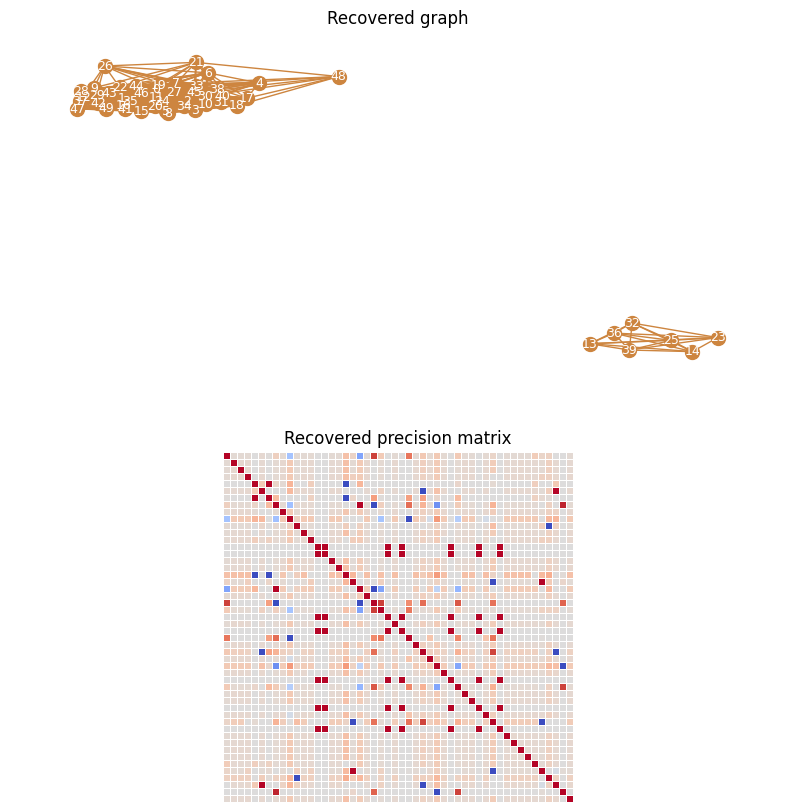

In [27]:
est_pd_ori_rnd_2.plot_graph_and_percision_matrix(fig_size=(10, 10))

### Draw another 50 rnd genes

In [28]:
n_genes = 50
random_indices = np.random.choice(ec_adata.shape[1], n_genes, replace=False)
ec_adata_50 = ec_adata[:, random_indices].copy()
ec_adata_50

AnnData object with n_obs × n_vars = 5964 × 50
    obs: 'strains', 'n_genes_by_counts', 'total_counts', 'n_genes', 'n_counts'
    var: 'strains', 'matchin_protein', 'protein', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'var_counts'
    uns: 'genes_match', 'protein_match', 'unmatch_genes'
    layers: 'counts', 'counts_scaled', 'sqrt_counts', 'sqrt_counts_scaled'

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\statsmodels\stats\correlation_tools.py:90: IterationLimitWarning: 
Maximum iteration reached.

  warnings.warn(iteration_limit_doc, IterationLimitWarning)


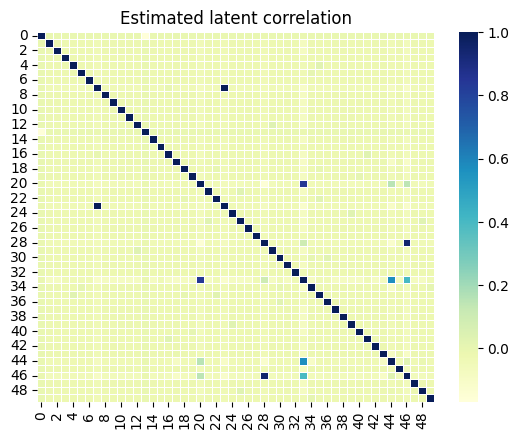

In [29]:
tps = ['tru' for i in range(ec_adata_50.shape[1])]
estimate = latentcor(ec_adata_50.layers['counts'].A, tps=tps, showplot=True, use_nearPD=True, method='original')

In [34]:
est_pd_ori_rnd_3 = gg_lasso_network_analysis(N=ec_adata_50.shape[0], estimate=estimate)
est_pd_ori_rnd_3.create_problem(S_col='R')
est_pd_ori_rnd_3.model_selection(lambda1_range=np.logspace(0, -1, 20))

 
SINGLE GRAPHICAL LASSO PROBLEM 
Regularization parameters:
{'lambda1': 0.05, 'mu1': None}
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 11 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 11 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 8 iterations with status: optimal.
ADMM terminated after 26 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 27 iterations with st

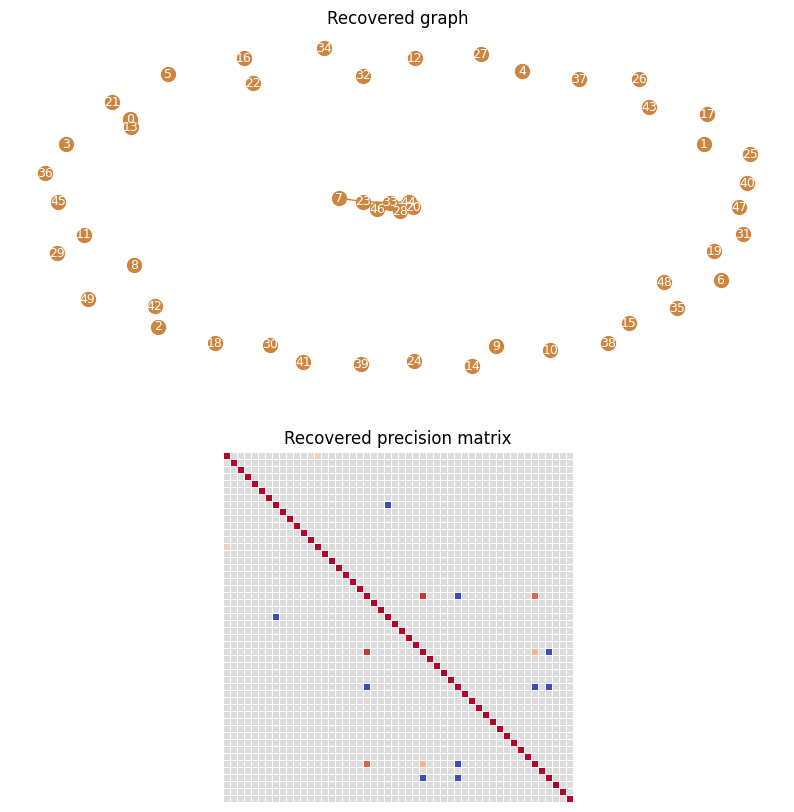

In [35]:
est_pd_ori_rnd_3.plot_graph_and_percision_matrix(fig_size=(10, 10))